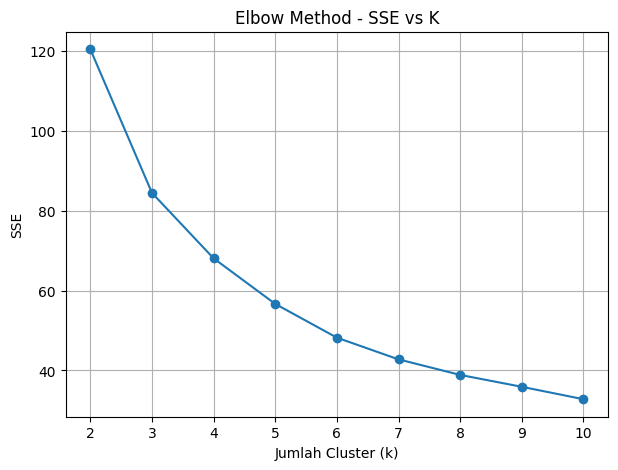

### SILHOUETTE SCORE ###
k=2 → Silhouette Score = 0.4231
k=3 → Silhouette Score = 0.3619
k=4 → Silhouette Score = 0.3549
k=5 → Silhouette Score = 0.3459
k=6 → Silhouette Score = 0.3310
k=7 → Silhouette Score = 0.3389
k=8 → Silhouette Score = 0.3279
k=9 → Silhouette Score = 0.3291
k=10 → Silhouette Score = 0.3227


In [2]:
# ============================================
# TAHAP 3: Tentukan Jumlah Cluster
# ============================================

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

rfm = pd.read_csv("RFM_online_retail.csv")

# 2. Mengambil fitur
scaled_features = rfm[["Recency", "Frequency", "Monetary"]]

# -----------------------------
# ELBOW METHOD
# -----------------------------
sse = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(7,5))
plt.plot(K, sse, marker='o')
plt.title("Elbow Method - SSE vs K")
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("SSE")
plt.grid(True)
plt.show()

# -----------------------------
# SILHOUETTE SCORE
# -----------------------------
print("### SILHOUETTE SCORE ###")
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_features)
    sil = silhouette_score(scaled_features, labels)
    print(f"k={k} → Silhouette Score = {sil:.4f}")


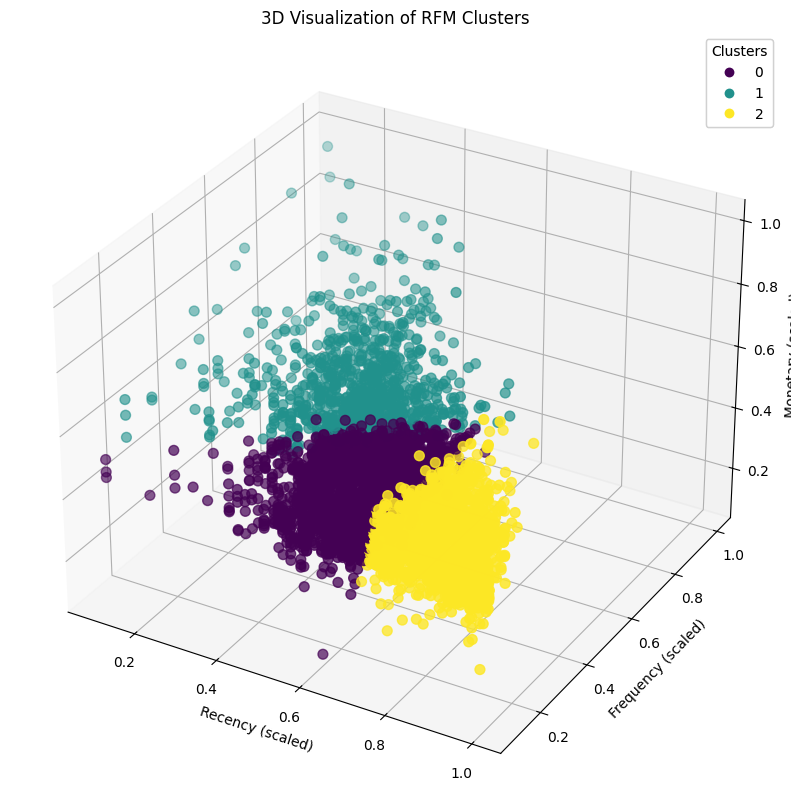

In [3]:
# ============================================
# TAHAP 4: Jalankan K-Means dan Visualisasi
# ============================================

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

optimal_k = 3

# 2. Jalankan K-Means
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
rfm["Cluster"] = kmeans.fit_predict(scaled_features)

# ============================================
# TAHAP 4: Visualisasi Hasil Clustering (1 Plot)
# ============================================

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Buat figure 3D
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    rfm["Recency"],
    rfm["Frequency"],
    rfm["Monetary"],
    c=rfm["Cluster"],
    s=50
)

ax.set_title("3D Visualization of RFM Clusters")
ax.set_xlabel("Recency (scaled)")
ax.set_ylabel("Frequency (scaled)")
ax.set_zlabel("Monetary (scaled)")

# Tambahkan legenda warna cluster
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()



In [4]:
# ============================================
# TAHAP 5: Interpretasi Cluster & Segmentasi
# ============================================

# Ringkasan tiap cluster
cluster_summary = rfm.groupby("Cluster")[["Recency", "Frequency", "Monetary"]].mean()
print(cluster_summary)

# Mapping Cluster → Segmentasi Pelanggan
cluster_labels = {
    0: "Loyal Customers",
    1: "At Risk",
    2: "Big Spenders"
}

rfm["Segment"] = rfm["Cluster"].map(cluster_labels)

print(rfm.to_string())



          Recency  Frequency  Monetary
Cluster                               
0        0.630812   0.203378  0.560680
1        0.510507   0.420971  0.684482
2        0.873966   0.140848  0.523620
      CustomerID   Recency  Frequency  Monetary  Cluster          Segment
0        12346.0  0.993833   0.100000  0.907489        2     Big Spenders
1        12347.0  0.534237   0.367813  0.700483        1          At Risk
2        12348.0  0.398243   0.277015  0.637747        1          At Risk
3        12349.0  0.635898   0.100000  0.636145        0  Loyal Customers
4        12350.0  0.986939   0.100000  0.517258        2     Big Spenders
5        12352.0  0.702618   0.390567  0.661589        1          At Risk
6        12353.0  0.925264   0.100000  0.422868        2     Big Spenders
7        12354.0  0.944406   0.100000  0.601191        2     Big Spenders
8        12355.0  0.932809   0.100000  0.539987        2     Big Spenders
9        12356.0  0.653433   0.233907  0.669837        0  Loyal C

In [5]:
rfm.to_csv("RFM_Clustering_Result.csv", index=False)


In [6]:
!git clone https://github.com/FairuzMaulidya/Capstone_Dicoding.git

Cloning into 'Capstone_Dicoding'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 14 (delta 0), reused 9 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (14/14), 269.42 KiB | 3.29 MiB/s, done.


In [7]:
%cd Capstone_Dicoding

/content/Capstone_Dicoding


In [8]:
!git branch

* main


In [9]:
!git checkout -b mutiara

Switched to a new branch 'mutiara'


In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
!ls "/content/drive/MyDrive/Capstone"

'Kmeans Classification-Interpretasi.ipynb'  'Mengganti Tahun InvoiceDate.ipynb'
